In [45]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [46]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [47]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [48]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [49]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [50]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [51]:
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [12]:
%pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.4 MB/s  0:00:00 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
from torchvision import datasets, transforms

In [4]:
#выгружаем выборку из torch (MNIST)

In [5]:
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

In [6]:
print("Numbers of MNIST training examples: {}".format(len(mnist_train)))
print("Numbers of MNIST test examples: {}".format(len(mnist_test)))

Numbers of MNIST training examples: 60000
Numbers of MNIST test examples: 10000


In [7]:
print(mnist_train[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [8]:
image, label = mnist_train[3]
print("Default image shape: {}".format(image.shape))


Default image shape: torch.Size([1, 28, 28])


In [9]:
image = image.reshape([28, 28])
print("Reshape image shape: {}".format(image.shape))

Reshape image shape: torch.Size([28, 28])


In [10]:
print(mnist_train[3])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

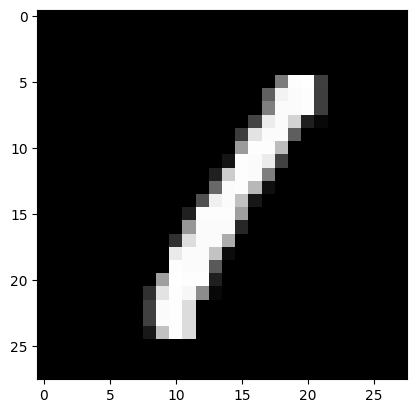

In [11]:
plt.imshow(image, cmap="gray")

In [12]:
print("The label for this image: {}".format(label))

The label for this image: 1


In [13]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [14]:
data_train_iter = iter(train_loader)
images, labels = next(data_train_iter)

print("Shape of the minibatch of images: {}".format(images.shape))
print("Shape of the minibatch of labels: {}".format(labels.shape))

Shape of the minibatch of images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of labels: torch.Size([100])


In [15]:
#модель логистической регрессии

In [16]:
x = images.view(-1, 28*28)
print("The shape of input x: {}".format(x.shape))

The shape of input x: torch.Size([100, 784])


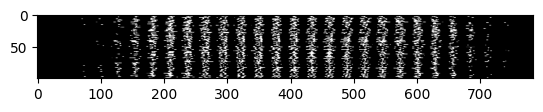

In [17]:
plt.imshow(x, cmap="gray")

In [18]:
W = torch.randn(784, 10)/np.sqrt(748)

In [19]:
print(W)

tensor([[ 0.0392,  0.0028,  0.0482,  ..., -0.0342, -0.0190,  0.0272],
        [ 0.0247,  0.0024,  0.0268,  ..., -0.0449,  0.0520, -0.0133],
        [ 0.0453, -0.0204,  0.0238,  ...,  0.0880,  0.0400, -0.0013],
        ...,
        [ 0.0175, -0.0121,  0.0446,  ..., -0.0141, -0.0122, -0.0281],
        [ 0.0344, -0.0206,  0.0260,  ...,  0.0209,  0.0345, -0.0191],
        [ 0.0323, -0.0014, -0.0156,  ..., -0.0063, -0.0013,  0.0114]])


In [20]:
W.requires_grad_()

tensor([[ 0.0392,  0.0028,  0.0482,  ..., -0.0342, -0.0190,  0.0272],
        [ 0.0247,  0.0024,  0.0268,  ..., -0.0449,  0.0520, -0.0133],
        [ 0.0453, -0.0204,  0.0238,  ...,  0.0880,  0.0400, -0.0013],
        ...,
        [ 0.0175, -0.0121,  0.0446,  ..., -0.0141, -0.0122, -0.0281],
        [ 0.0344, -0.0206,  0.0260,  ...,  0.0209,  0.0345, -0.0191],
        [ 0.0323, -0.0014, -0.0156,  ..., -0.0063, -0.0013,  0.0114]],
       requires_grad=True)

In [21]:
b = torch.zeros(10, requires_grad=True)

In [22]:
print(b)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


In [23]:
y = torch.matmul(x, W) + b

In [24]:
print(y[0,:])

tensor([-0.3082, -0.0879, -0.0383,  0.1642,  0.1152,  0.3226, -0.1657,  0.1054,
         0.0794, -0.2618], grad_fn=<SliceBackward0>)


In [25]:
py_eq = torch.exp(y)/torch.sum(torch.exp(y), dim=1, keepdim=True)
print("{}".format(py_eq[0]))

py_eq = torch.nn.functional.softmax(y, dim=1)
print("{}".format(py_eq[0]))

tensor([0.0727, 0.0906, 0.0952, 0.1166, 0.1110, 0.1366, 0.0839, 0.1100, 0.1071,
        0.0762], grad_fn=<SelectBackward0>)
tensor([0.0727, 0.0906, 0.0952, 0.1166, 0.1110, 0.1366, 0.0839, 0.1100, 0.1071,
        0.0762], grad_fn=<SelectBackward0>)


In [26]:
print(labels.shape)

torch.Size([100])


In [32]:

cross_entropy = torch.nn.functional.cross_entropy(y, labels)

In [33]:
print("croos entropy with torch.nn.functional.cross_entropy: {}".format(cross_entropy))

croos entropy with torch.nn.functional.cross_entropy: 2.4158339500427246


In [36]:
optimazer = torch.optim.SGD([W,b], lr=0.1)

In [37]:
cross_entropy.backward()

In [38]:
b.grad

tensor([-0.0190, -0.0382,  0.0045,  0.0234,  0.0063,  0.0257, -0.0160,  0.0116,
        -0.0082,  0.0098])

In [39]:
optimazer.step()

In [40]:
b

tensor([ 0.0019,  0.0038, -0.0004, -0.0023, -0.0006, -0.0026,  0.0016, -0.0012,
         0.0008, -0.0010], requires_grad=True)

In [41]:
print("b.grad before zero_grad(): {}".format(b.grad))
optimazer.zero_grad()
print("b.grad after zero_grad(): {}".format(b.grad))

b.grad before zero_grad(): tensor([-0.0190, -0.0382,  0.0045,  0.0234,  0.0063,  0.0257, -0.0160,  0.0116,
        -0.0082,  0.0098])
b.grad after zero_grad(): None


In [58]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tqdm import tqdm

for batch_idx, (images, labels) in enumerate(tqdm(train_loader)):
    optimazer.zero_grad()
    
    x = images.flatten(start_dim=1)

    logits = x @ W + b
    loss = torch.nn.functional.cross_entropy(logits, labels)

    loss.backward()
    optimazer.step()


100%|████████████████████████████████████████| 600/600 [00:01<00:00, 364.31it/s]


In [60]:
correct = 0
total = len(mnist_test)

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
    
print('Test accuracy: {}'.format(correct/total))    


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 401.98it/s]

Test accuracy: 0.9108999967575073


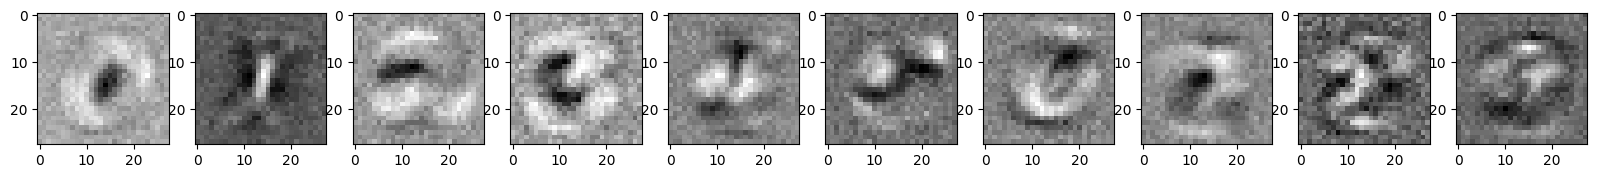

In [61]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for digit in range(10):
    ax[digit].imshow(W[:,digit].detach().view(28,28), cmap='gray')